# Worksheet 06

Name:  
UID: 

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

In K-means++, the first cluster centroid is chosen randomly from the data points. Subsequent centroids are selected with a higher probability of being far from existing centroids.  The goal of both algorithms is to minimize the sum of squared distances between data points and their assigned cluster centroids. K-means++ initialization often results in better convergence and more reliable clustering, making it a preferred choice in practice.

b) What are some limitations of K means ++?

It may converge on local minima and it has a set number of clusters.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

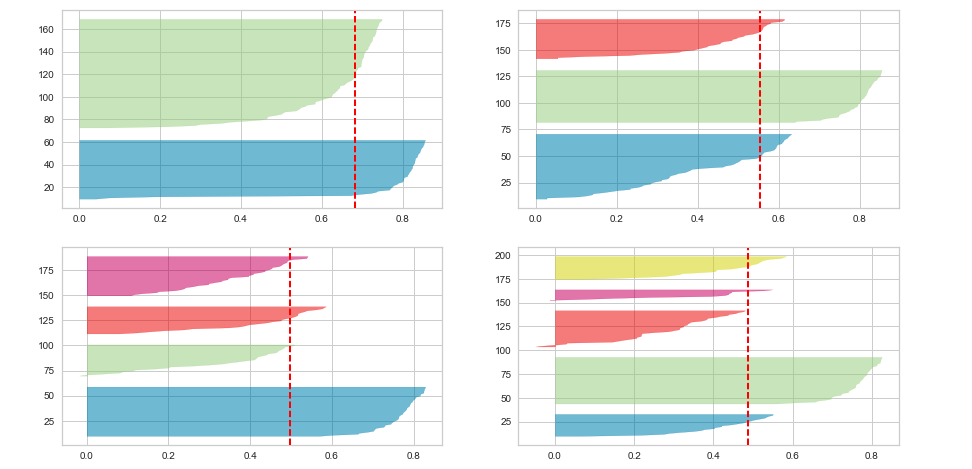

In [9]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

You want a lot of data points right of the red line.  The top two look good as every cluster is over the line.  The bottom two there is a high skew and most of the clusters are below the average.  The first one may be the best, as it has less of a skew than the second.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A   | B   | C   | D   | E   |
|---|-----|-----|-----|-----|-----|
| A | 0   | 1.41| 3   | 1   | 2.83|
| B | 1.41| 0   | 2.24| 1.41| 1.41|
| C | 3   | 2.24| 0   | 3   | 1.41|
| D | 1   | 1.41| 3   | 0   | 2.24|
| E | 2.83| 1.41| 1.41| 2.24| 0   |



Step 2

|   | AD  | B   | C   | E   |
|---|-----|-----|-----|-----|
| AD| 0   | 1.41| 3   | 2.83|
| B | 1.41| 0   | 2.24| 1.41|
| C | 3   | 2.24| 0   | 3   |
| E | 2.83| 1.41| 3   | 0   |


Step 3

|   | ADE | B   | C   |
|---|-----|-----|-----|
| ADE| 0   | 1.41| 3   |
| B  | 1.41| 0   | 2.24|
| C  | 3   | 2.24| 0   |


Step 4

|   | ADEB| C   |
|---|-----|-----|
| ADEB| 0   | 3   |
| C   | 3   | 0   |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A   | B   | C   | D   | E   |
|---|-----|-----|-----|-----|-----|
| A | 0   | 1.41| 3   | 1   | 2.83|
| B | 1.41| 0   | 2.24| 1.41| 1.41|
| C | 3   | 2.24| 0   | 3   | 1.41|
| D | 1   | 1.41| 3   | 0   | 2.24|
| E | 2.83| 1.41| 1.41| 2.24| 0   |


Step 2

|   | AD  | B   | C   | E   |
|---|-----|-----|-----|-----|
| AD| 0   | 1.41| 3   | 2.83|
| B | 1.41| 0   | 2.24| 1.41|
| C | 3   | 2.24| 0   | 3   |
| E | 2.83| 1.41| 3   | 0   |


Step 3

|   | ADE | B   | C   |
|---|-----|-----|-----|
| ADE| 0   | 1.41| 3   |
| B  | 1.41| 0   | 2.83|
| C  | 3   | 2.83| 0   |


Step 4

|   | ADE | BC  |
|---|-----|-----|
| ADE| 0   | 3   |
| BC | 3   | 0   |


## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

/var/folders/mf/txv8p7fx2yz68v4bx9pfbxf80000gn/T/ipykernel_86026/2022968093.py:42: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(hamming_matrix, method='single')


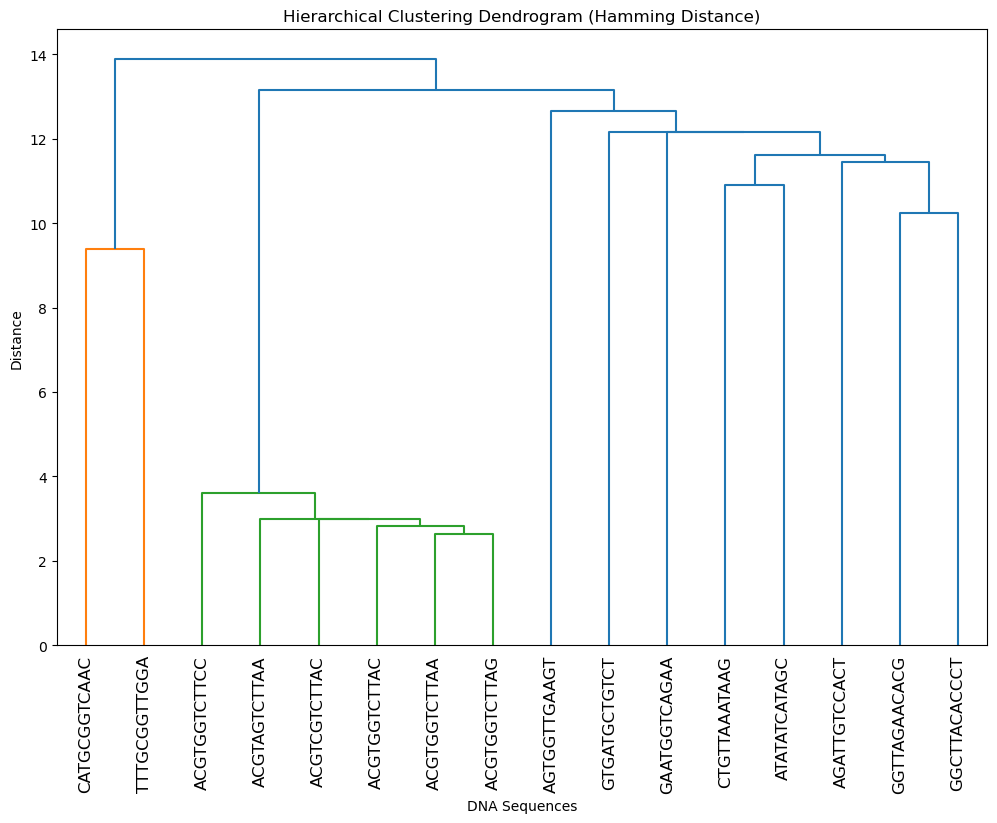

In [8]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

def calculate_hamming_matrix(sequences):
    n = len(sequences)
    matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            matrix[i, j] = hamming_distance(sequences[i], sequences[j])

    return matrix

# Read the dataset
sequences = [
    'ACGTGGTCTTAA',
    'ACGTCGTCTTAC',
    'ACGTGGTCTTAC',
    'ACGTAGTCTTAA',
    'ACGTGGTCTTCC',
    'ACGTGGTCTTAG',
    'CTGTTAAATAAG',
    'GGTTAGAACACG',
    'AGTGGTTGAAGT',
    'GGCTTACACCCT',
    'AGATTGTCCACT',
    'CATGCGGTCAAC',
    'ATATATCATAGC',
    'TTTGCGGTTGGA',
    'GAATGGTCAGAA',
    'GTGATGCTGTCT'
]

# Compute Hamming distance matrix
hamming_matrix = calculate_hamming_matrix(sequences)

# Hierarchical Clustering
linkage_matrix = linkage(hamming_matrix, method='single')

# Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=sequences, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Hamming Distance)')
plt.xlabel('DNA Sequences')
plt.ylabel('Distance')
plt.show()
